# Decision Trees and Random Forests example using the wine database
The problem in this base is identify the wine productor based on wine features

In [1]:
import numpy as np  
import matplotlib.pyplot as plt

## Load the dataset and convert it to pandas data frame

In [2]:
from sklearn import datasets
import pandas as pd

data = datasets.load_wine()
# convert sklearn dataset to pandas data frame
wine = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= data['feature_names'] + ['target'])

wine.info()
wine.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
target                          178 non-null float64
dtypes: float64(14)
memory usage: 19.5 KB


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


## Split the dataset
First into input features (X) and output (y) and then into train and test sets with size 0.7/0.3

In [3]:
from sklearn.model_selection import train_test_split

X = wine.drop('target', axis=1)
y = wine['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Create and train the Decision Tree Classifier

In [4]:
from sklearn import tree

model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Use the model to predict the samples in the test set

In [5]:
model.fit(X_train,y_train)
predictions = model.predict(X_test)

## Evaluate the model

In [6]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88        20
         1.0       0.89      0.71      0.79        24
         2.0       0.71      1.00      0.83        10

   micro avg       0.83      0.83      0.83        54
   macro avg       0.82      0.87      0.83        54
weighted avg       0.85      0.83      0.83        54



## Display the confusion matrix 

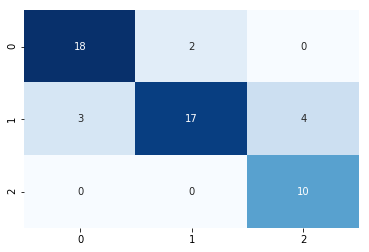

In [7]:
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix

cfm = confusion_matrix(y_test,predictions)
sns.heatmap(cfm, cbar=False, annot=True, cmap="Blues", fmt="d")

## Let's create an image with the decision tree
You'll need some extra libs (IPython and pydot)
* Each OS may require other specific installs.
Mac OS users for example need to install other dependencies. In my case, installing gprofdot (brew install gprof2dot) was enough.

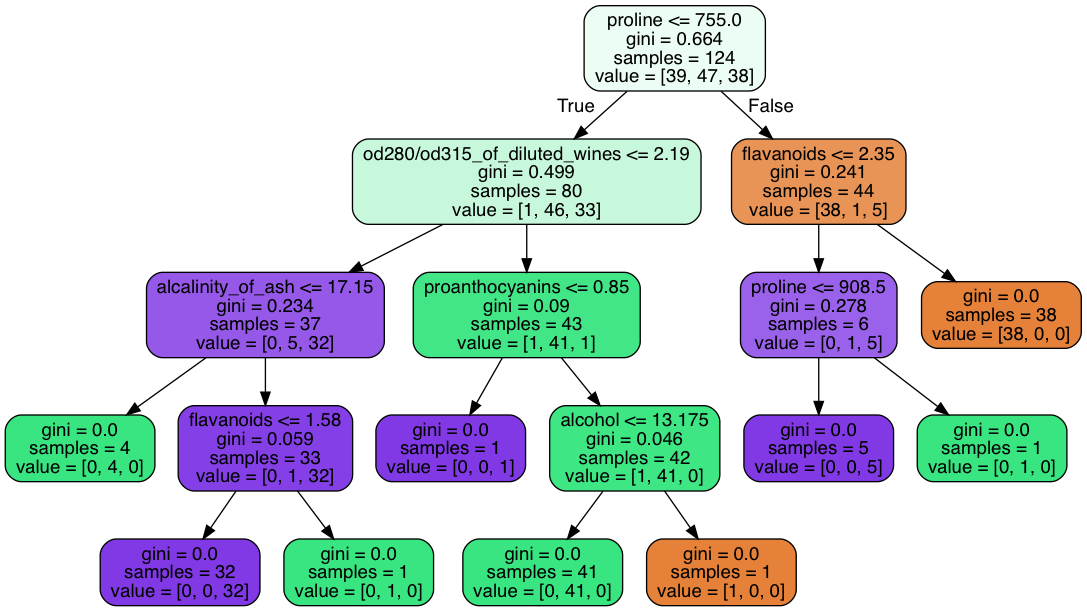

In [8]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(wine.columns[:-1])
features

dot_data = StringIO()  
export_graphviz(model, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
img = Image(graph[0].create_png())
graph[0].write_png('tree_wine_viz.png')
img

# Random Forests
One tree performed well but lets see if Random Forest can improve the result.
## Create a Random Forest with 100 trees
Evaluate the result and then display the confusion matrix

In [9]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train,y_train)
predictions = forest.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98        20
         1.0       1.00      0.96      0.98        24
         2.0       1.00      1.00      1.00        10

   micro avg       0.98      0.98      0.98        54
   macro avg       0.98      0.99      0.98        54
weighted avg       0.98      0.98      0.98        54



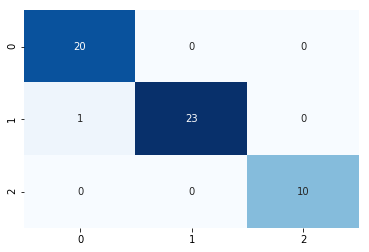

In [10]:
cfm = confusion_matrix(y_test,predictions)
sns.heatmap(cfm, cbar=False, annot=True, cmap="Blues", fmt="d")

## Validate if my model with cross validation

In [14]:
from sklearn.model_selection import cross_val_score

cross_forest = RandomForestClassifier(n_estimators=200)
scores = cross_val_score(cross_forest, X, y, cv=10)
scores

array([1.        , 0.94444444, 1.        , 0.94444444, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [15]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.99 (+/- 0.04)
